In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("./combine_2010_2025")


In [4]:
df = df[df["Pos"].isin(["WR", "CB", "RB", "FS", "OLB", "ILB", "SS", "TE"])]

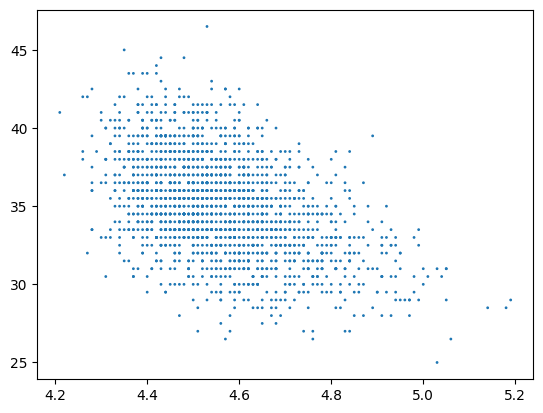

In [5]:
x = df["40yd"]
y = df["Vertical"]

plt.scatter(x, y, sizes=[1 for _ in x])

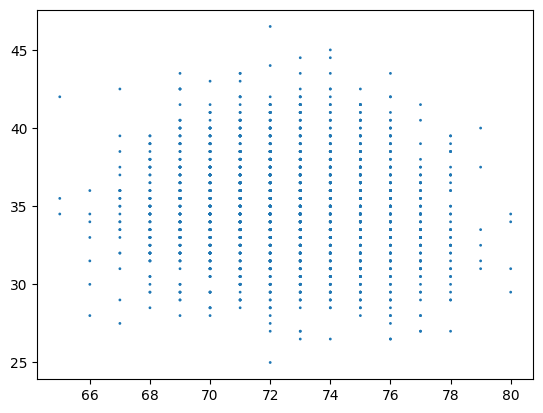

In [6]:
x = df["Ht"]
y = df["Vertical"]

plt.scatter(x, y, sizes=[1 for _ in x])

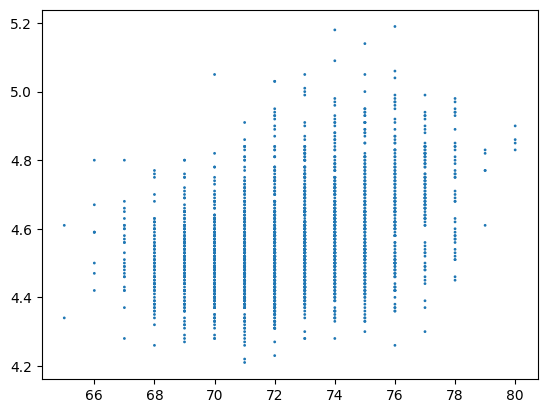

In [7]:
x = df["Ht"]
y = df["40yd"]

plt.scatter(x, y, sizes=[1 for _ in x])

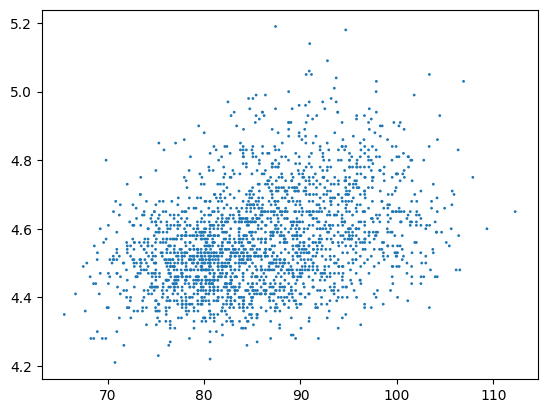

In [8]:
x = (df["Wt"] * 0.4535924) * (177 / (df["Ht"] * 2.54)) ** 3
y = df["40yd"]

plt.scatter(x, y, sizes=[1 for _ in x])

np.float64(35.0)

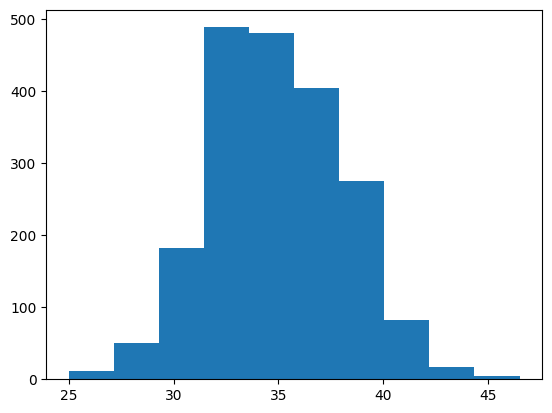

In [9]:
plt.hist(df["Vertical"])
df["Vertical"].median()

np.float64(4.55)

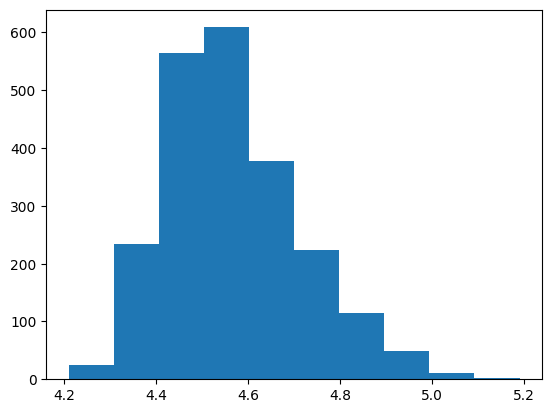

In [10]:
plt.hist(df["40yd"])
df["40yd"].median()

Text(0, 0.5, '40yd')

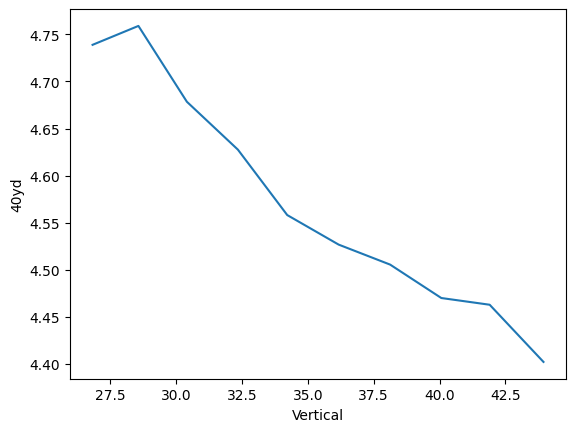

In [14]:
forty_and_vertical = df.loc[:, ["40yd", "Vertical"]]
forty_and_vertical.dropna(inplace=True)
bins = np.arange(forty_and_vertical["Vertical"].min(), forty_and_vertical["Vertical"].max(), 2)
forty_and_vertical["Bins"] = pd.cut(forty_and_vertical["Vertical"], bins)
aggregated = forty_and_vertical.groupby(by=forty_and_vertical["Bins"], observed=True).agg({
    "40yd": "mean",
    "Vertical": "mean"
})

plt.plot(aggregated["Vertical"], aggregated["40yd"])
plt.xlabel("Vertical")
plt.ylabel("40yd")


Text(0, 0.5, '40yd')

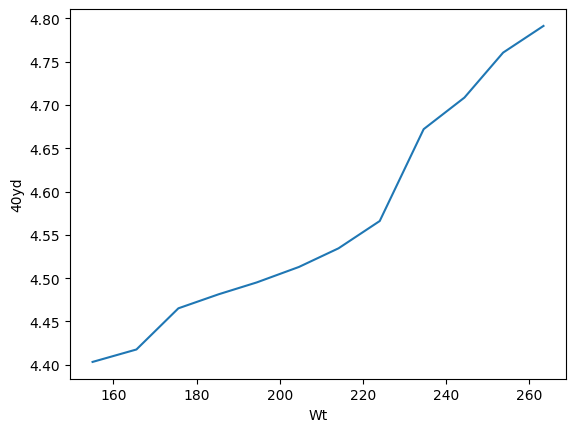

In [13]:
forty_and_wt = df.loc[:, ["40yd", "Wt"]]
forty_and_wt.dropna(inplace=True)
bins = np.arange(forty_and_wt["Wt"].min(), forty_and_wt["Wt"].max(), 10)
forty_and_wt["Bins"] = pd.cut(forty_and_wt["Wt"], bins)
aggregated = forty_and_wt.groupby(by=forty_and_wt["Bins"], observed=True).agg({
    "40yd": "mean",
    "Wt": "mean"
})

plt.plot(aggregated["Wt"], aggregated["40yd"])
plt.xlabel("Wt")
plt.ylabel("40yd")